# **KMeans Introduction**

## **Create Synthetic Data**

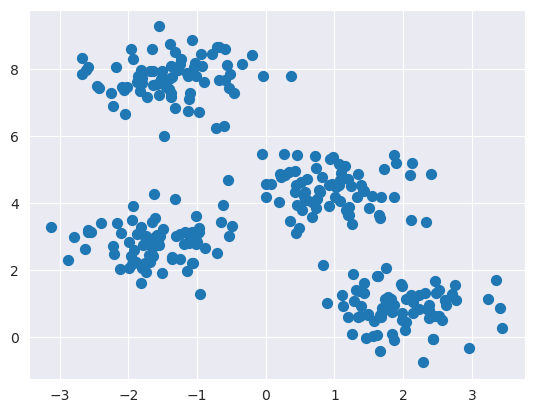

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns

# Create synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

## **KMeans Clustering**

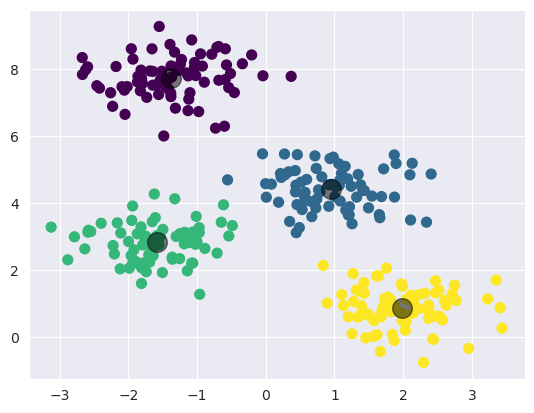

In [155]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# show scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## **Expectation-Maximization Algorithm**

The Expectation-Maximization (EM) algorithm is a statistical technique used for finding maximum likelihood estimates of parameters in probabilistic models, particularly when the data is incomplete or has latent variables. In the context of K-means clustering, the EM algorithm provides a framework for understanding how K-means operates through iterative updates of cluster assignments and centroids.

## Overview of K-means and EM

K-means clustering can be viewed as a specific case of the EM algorithm, where the goal is to partition data points into \( K \) clusters based on their features. The algorithm alternates between two main steps:

1. **Expectation Step (E-step)**: Assign each data point to the cluster whose centroid is closest, effectively estimating the "responsibility" of each cluster for each data point.
2. **Maximization Step (M-step)**: Update the centroids of the clusters based on the current assignments, maximizing the likelihood of the data given the cluster assignments.

### Detailed Steps of the EM Algorithm in K-means

1. **Initialization**:
   - Randomly select \( K \) initial centroids from the dataset.

2. **E-step (Expectation)**:
   - For each data point, calculate the distance to each centroid.
   - Assign each data point to the nearest centroid. This forms the clusters.

   $$
   \text{Cluster Assignment} = \arg\min_{k} \|x_i - \mu_k\|^2
   $$

   Where:
   - \( x_i \) is the data point.
   - \( \mu_k \) is the centroid of cluster \( k \).

3. **M-step (Maximization)**:
   - Update each centroid as the mean of all data points assigned to that cluster.

   $$
   \mu_k = \frac{1}{N_k} \sum_{x_i \in C_k} x_i
   $$

   Where:
   - \( N_k \) is the number of points in cluster \( k \).
   - \( C_k \) is the set of points assigned to cluster \( k \).

4. **Convergence Check**:
   - Repeat the E-step and M-step until the centroids no longer change significantly or until a maximum number of iterations is reached.

## Relationship Between K-means and EM

- The K-means algorithm can be interpreted as a special case of the EM algorithm where:
  - The likelihood function is based on the squared Euclidean distance.
  - The latent variable is the cluster assignment of each point.
  
This interpretation highlights that K-means is a form of soft clustering, as it assigns each data point to the nearest cluster based on distance, rather than probabilistically.

## Advantages of the EM Approach

- **Probabilistic Framework**: The EM algorithm provides a probabilistic interpretation of K-means, making it easier to extend to more complex models (e.g., Gaussian Mixture Models).
- **Convergence Guarantees**: The EM algorithm is guaranteed to converge to a local maximum of the likelihood function.

## Limitations of the EM Approach

- **Local Optima**: Like K-means, the EM algorithm can converge to local optima depending on the initialization of centroids.
- **Complexity**: EM can be computationally intensive, especially for large datasets or complex models.

## Summary

The Expectation-Maximization algorithm provides a robust framework for understanding K-means clustering. By alternating between the expectation and maximization steps, K-means effectively partitions data into clusters based on proximity to centroids. This approach serves as a foundational concept for more advanced clustering techniques in machine learning.

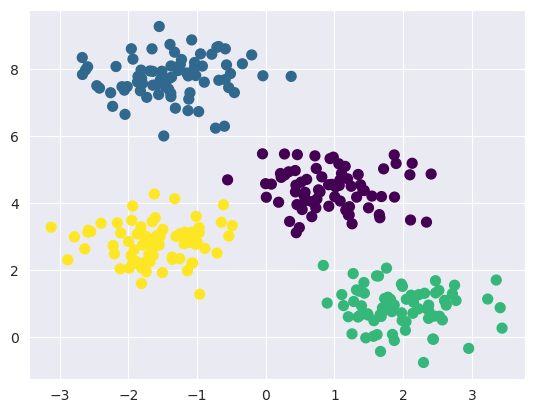

In [156]:
from sklearn.metrics import pairwise_distances_argmin

# create function to find clusters
# X: data, n_clusters: number of clusters
# rseed: random seed for initialization of centroids
# returns: centroids, labels
# centroids: coordinates of cluster centers
# labels: cluster assignments for each data point
# based on pairwise distances to centroids 
# (assign each data point to the closest centroid)
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    # initialize random number generator with seed rseed
    rng = np.random.RandomState(rseed)
    # randomly choose n_clusters data points as initial centroids
    # i: indices of chosen data points (centroids)
    # rng.permutation(X.shape[0]): shuffle indices of data points
    # permutation returns a shuffled sequence of 0 to X.shape[0]
    # permutation is useful for shuffling data points randomly 
    # (e.g., for initialization of centroids) 
    # [:n_clusters]: select first n_clusters shuffled indices
    # these indices correspond to the chosen data points
    i = rng.permutation(X.shape[0])[:n_clusters]
    # X[i]: coordinates of chosen data points (centroids) 
    centers = X[i]

    # iterate until convergence (centers no longer change significantly)
    while True:
        # 2a. Assign labels based on closest center
        # pairwise_distances_argmin:
        # Compute minimum distances between one point and a set of points.
        # X: data points, centers: cluster centers 
        # returns: indices of the closest centers for each data point 
        # (i.e., cluster assignments) 
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        # compute new centers as the mean of data points in each cluster
        # X[labels == i]: select data points in cluster i 
        # np.array([... for i in range(n_clusters)]: 
        # create an array of new centers for each cluster 
        # by taking the mean of data points in that cluster
        # new_centers: new centroids based on the current cluster assignments
        # (i.e., the mean of data points in each cluster) 
        # (note: if a cluster has no data points, the mean will be NaN)
        # to handle this, we can ignore NaN values by using np.nanmean
        # np.nanmean computes the mean of elements ignoring NaN values
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        # np.all(centers == new_centers): check if all elements are equal
        # if the centers no longer change significantly, break the loop
        # (i.e., convergence has been reached)
        # otherwise, update the centers and continue the iteration
        # until convergence is reached
        # centers: previous centroids, new_centers: updated centroids
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

# apply find_clusters function to synthetic data X
# X for synthetic data, 4 for number of clusters
# why 4 clusters? because we generated 4 clusters in the synthetic data
# centers: cluster centers, labels: cluster assignments for each data point
centers, labels = find_clusters(X, 4)

# show scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

### **Random Change of Centroids**

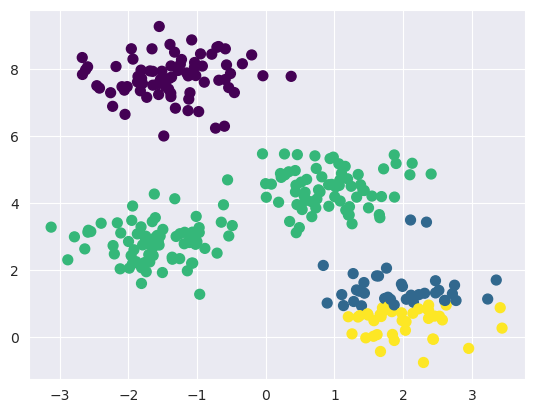

In [157]:
# rseed=0: random seed for initialization of centroids
# (to ensure reproducibility of results)
# note: different random seeds may result in different cluster assignments
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

### **Optimalization Clusters**

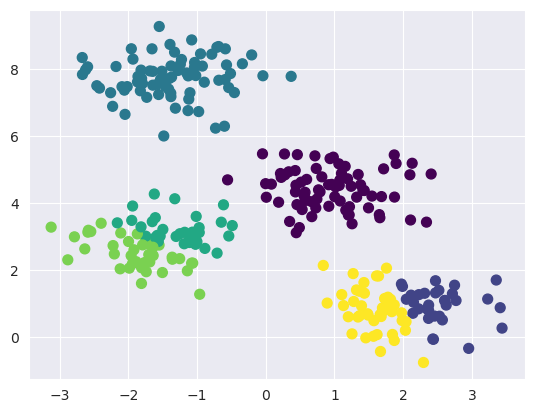

In [158]:
# using KMeans from sklearn to find optimal clusters
labels = KMeans(6, random_state=0).fit_predict(X)

# show scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

## **Non-Linear Clustering**

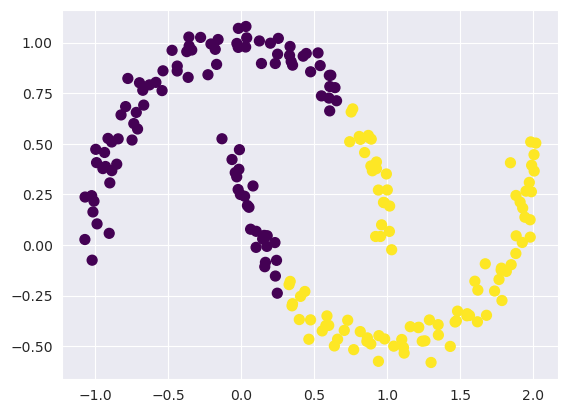

In [159]:
from sklearn.datasets import make_moons

# create synthetic data with non-linear clusters
X, y = make_moons(200, noise=.05, random_state=0)

# apply KMeans with 2 clusters to non-linear data
labels = KMeans(2, random_state=0).fit_predict(X)

# show scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

### **Spectral Clustering for Non-Linear Data**

### Introduction

Spectral clustering is an advanced clustering technique that utilizes the properties of eigenvalues and eigenvectors of matrices derived from the data to perform clustering. It is particularly effective for identifying clusters in non-linear data distributions, where traditional methods like K-means may struggle.

### Overview of Spectral Clustering

Spectral clustering is based on the idea of transforming the data into a lower-dimensional space using the spectrum (eigenvalues) of a similarity matrix. This transformation allows for more complex cluster shapes to be recognized.

#### Key Steps in Spectral Clustering

1. **Construct the Similarity Graph**:
   - Begin by constructing a similarity graph from the dataset. Each data point is a node, and edges represent the similarity (or distance) between data points.
   - Common measures for similarity include:
     - **Gaussian (RBF) Kernel**: $$ S_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right) $$
     - **K-nearest neighbors**: Connect each point to its \( K \) nearest neighbors.

2. **Create the Laplacian Matrix**:
   - The Laplacian matrix \( L \) is derived from the similarity graph. It can be computed using the Degree matrix \( D \) and the Adjacency matrix \( A \):
   $$
   L = D - A
   $$
   Where:
   - \( D \) is a diagonal matrix where \( D_{ii} \) is the sum of the weights of the edges connected to node \( i \).
   - \( A \) is the adjacency matrix representing connections between nodes.

3. **Compute the Eigenvalues and Eigenvectors**:
   - Calculate the eigenvalues and eigenvectors of the Laplacian matrix \( L \).
   - Select the top \( k \) eigenvectors corresponding to the \( k \) smallest eigenvalues. These eigenvectors form a new feature space where clustering can be performed.

4. **Clustering in the New Space**:
   - Form a new matrix \( X \) where each row corresponds to the \( k \) eigenvector values for each data point.
   - Apply a clustering algorithm (commonly K-means) on this new representation \( X \) to identify clusters.

5. **Assign Original Data Points**:
   - The final step is to assign the original data points to the clusters based on the results from the clustering algorithm applied to the eigenvector matrix.

### Advantages of Spectral Clustering

- **Ability to Handle Non-linear Data**: Spectral clustering can identify complex cluster structures that are not linearly separable, making it suitable for various datasets.
- **Flexibility**: The choice of similarity graph allows for the adaptation of spectral clustering to different types of data and clustering requirements.
- **Robustness**: It can be more robust to noise and outliers compared to traditional methods.

### Limitations of Spectral Clustering

- **Computational Complexity**: Calculating eigenvalues and eigenvectors can be computationally intensive, especially for large datasets.
- **Parameter Sensitivity**: The choice of parameters, such as the number of clusters \( k \) and the similarity measure, can significantly affect clustering results.
- **Scaling Issues**: The method may not scale well with very large datasets due to the need to compute the full similarity matrix.

### Applications of Spectral Clustering

- **Image Segmentation**: Dividing an image into segments based on pixel similarity.
- **Social Network Analysis**: Identifying communities within social networks based on user interactions.
- **Biological Data Analysis**: Clustering gene expression data to find groups of co-expressed genes.

### Summary

Spectral clustering is a powerful technique for tackling clustering problems in non-linear datasets. By leveraging the properties of the Laplacian matrix and the spectrum of eigenvalues, it can effectively reveal complex cluster structures that traditional methods may miss. Understanding and implementing spectral clustering can provide significant advantages in various applications across different domains.

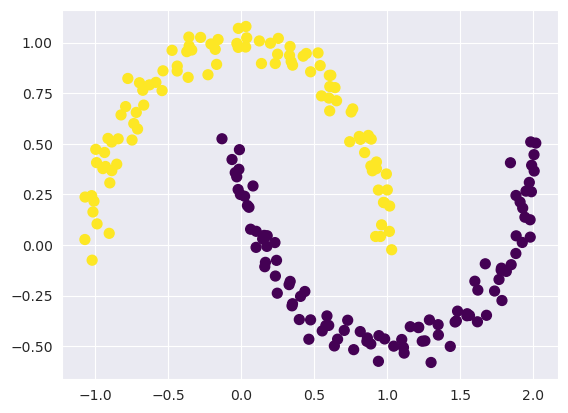

In [160]:
from sklearn.cluster import SpectralClustering

# apply Spectral Clustering to non-linear data
# n_clusters: number of clusters, affinity: similarity measure (e.g., nearest neighbors) 
# assign_labels: strategy for assigning labels (e.g., k-means)
# n_neighbors: number of neighbors to consider for affinity computation 
# (used when affinity='nearest_neighbors') 
# note: n_neighbors should be chosen based on the data characteristics 
# to capture the underlying structure effectively
# here, we set n_neighbors=11 based on the synthetic data characteristics
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', n_neighbors=11)

# fit and predict on non-linear data
labels = model.fit_predict(X)

# show scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

# **Study Case**

## **1. Image Number**

### **Load Image Number**

In [161]:
from sklearn.datasets import load_digits

# load digits dataset
digits = load_digits()
digits.data.shape

(1797, 64)

### **Visualize Image Number**

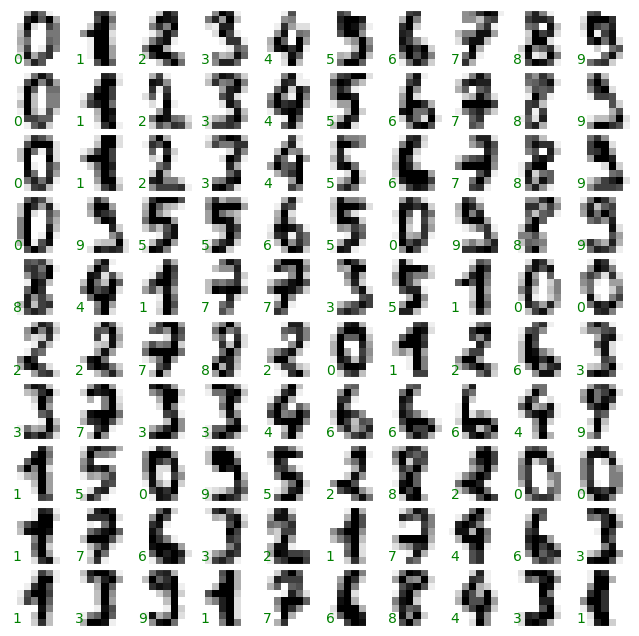

In [162]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1)) # set spacing between subplots to 0.1 

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    axi.text(0.05, 0.05, str(digits.target[i]),
                transform=axi.transAxes, color='green')
plt.show()

### **KMeans Clustering on Image Number**

Shape of cluster centers: (10, 64)


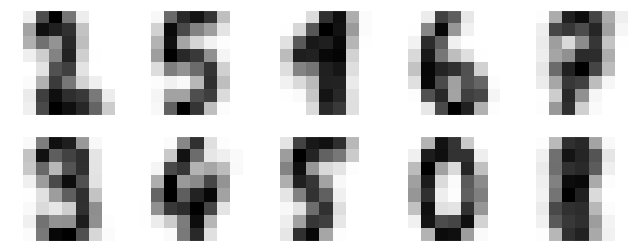

In [163]:
# apply KMeans to digits data
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

# show shape of cluster centers
print(f'Shape of cluster centers: {kmeans.cluster_centers_.shape}')

# visualize cluster centers
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### **Evaluate KMeans Clustering on Image Number**

In [164]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# find the most common label in each cluster
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# calculate accuracy of clustering
accuracy = accuracy_score(digits.target, labels)
print(f'Accuracy of clustering: {accuracy}')

Accuracy of clustering: 0.7440178074568725


### **Visualize Confusion Matrix on KMeans**

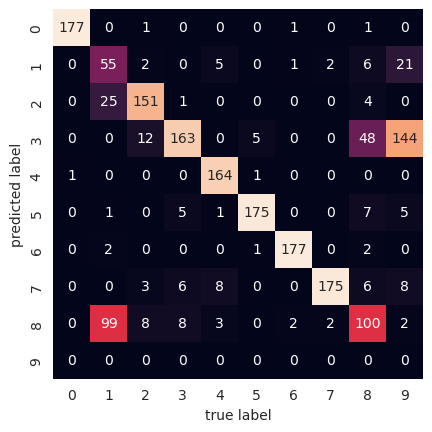

In [165]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### **KMeans with t-SNE On Image Number**

### t-SNE (t-distributed Stochastic Neighbor Embedding)

### Overview

t-SNE is a dimensionality reduction technique specifically designed for visualizing high-dimensional data. It converts high-dimensional Euclidean distances into conditional probabilities that represent similarities between points.

### How t-SNE Works

1. **Pairwise Similarities**:
   - For each data point, calculate the similarity of all other data points using a Gaussian distribution.
   - The similarity is transformed into conditional probabilities that reflect how likely a point \( j \) would be selected as a neighbor of point \( i \).

2. **Low-dimensional Representation**:
   - In a lower-dimensional space (typically 2D or 3D), t-SNE tries to find a representation where the pairwise similarities are preserved as much as possible.
   - The t-distribution is used to model distances in the lower-dimensional space to emphasize the local structure of the data.

3. **Optimization**:
   - The algorithm minimizes the Kullback-Leibler divergence between the high-dimensional and low-dimensional representations using gradient descent.

### Benefits of t-SNE

- **Preserves Local Structure**: t-SNE is particularly effective at preserving local relationships in the data, making it suitable for visualizing clusters.
- **Non-linear Dimensionality Reduction**: Unlike linear techniques (e.g., PCA), t-SNE can capture complex patterns in the data.

### Combining K-means and t-SNE

### Workflow

1. **Dimensionality Reduction**: Apply t-SNE to reduce the dimensionality of the dataset to 2D or 3D.
2. **Clustering**: Use K-means on the low-dimensional representation to identify clusters.

### Advantages of Combining

- **Improved Clustering**: By reducing dimensionality, t-SNE can help K-means find more meaningful clusters in complex data distributions.
- **Visualization**: The 2D representation allows for easy visualization of clusters and their relationships, making the results more interpretable.

### Example Use Case

- **Image Data**: In image classification tasks, applying t-SNE to a high-dimensional pixel dataset can reveal distinct clusters corresponding to different objects or classes, which can then be further analyzed using K-means for clustering.

### Summary

Using K-means clustering in conjunction with t-SNE provides a powerful approach to analyzing and visualizing high-dimensional data. By leveraging t-SNE for dimensionality reduction, practitioners can improve clustering outcomes and gain insights into the structure of their data, making it easier to interpret and act upon the results.

In [166]:
from sklearn.manifold import TSNE

# apply t-SNE to digits data
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# calculate KMeans on t-SNE projected data
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# find the most common label in each cluster
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# calculate accuracy of clustering
accuracy = accuracy_score(digits.target, labels)
print(f'Accuracy of clustering (KMeans with t-SNE): {accuracy}')

Accuracy of clustering (KMeans with t-SNE): 0.9415692821368948


### **Visualize Confusion Matrix in KMeans with t-SNE**

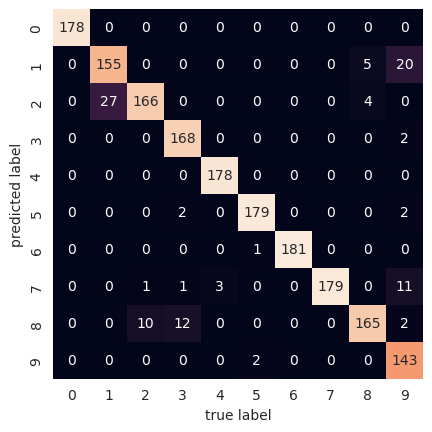

In [167]:
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## **2. Image Compression**

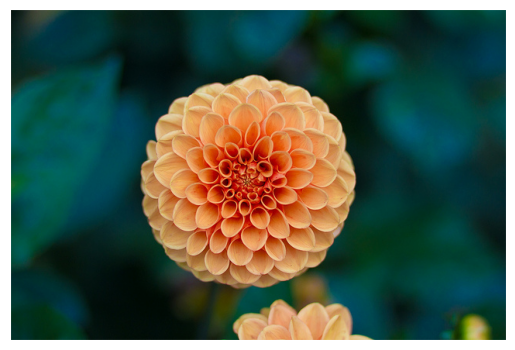

In [168]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

### **Normalize Image Data**

In [169]:
# image data before normalization
print(f'Image shape before normalization: {flower.shape}')
# normalize the data
data = flower / 255.0
data = data.reshape(427 * 640, 3)
print(f'Image shape after normalization: {data.shape}')

Image shape before normalization: (427, 640, 3)
Image shape after normalization: (273280, 3)


### **Create function to plot pixels**

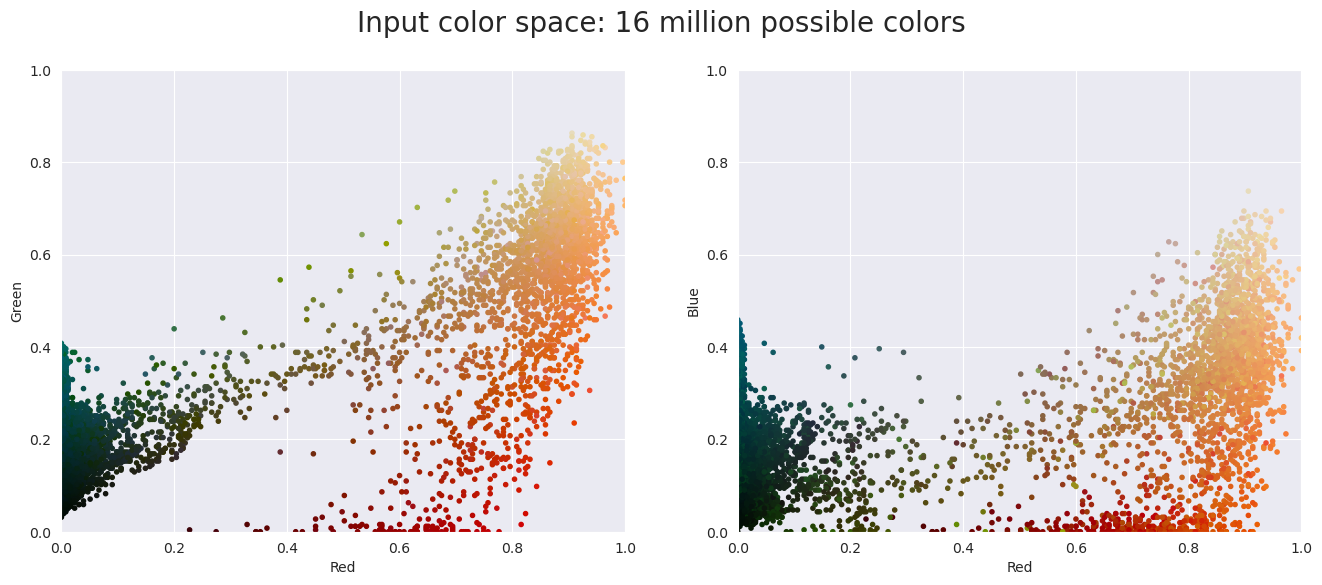

In [170]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

plot_pixels(data, title='Input color space: 16 million possible colors')

### **Apply KMeans to Image Compression**

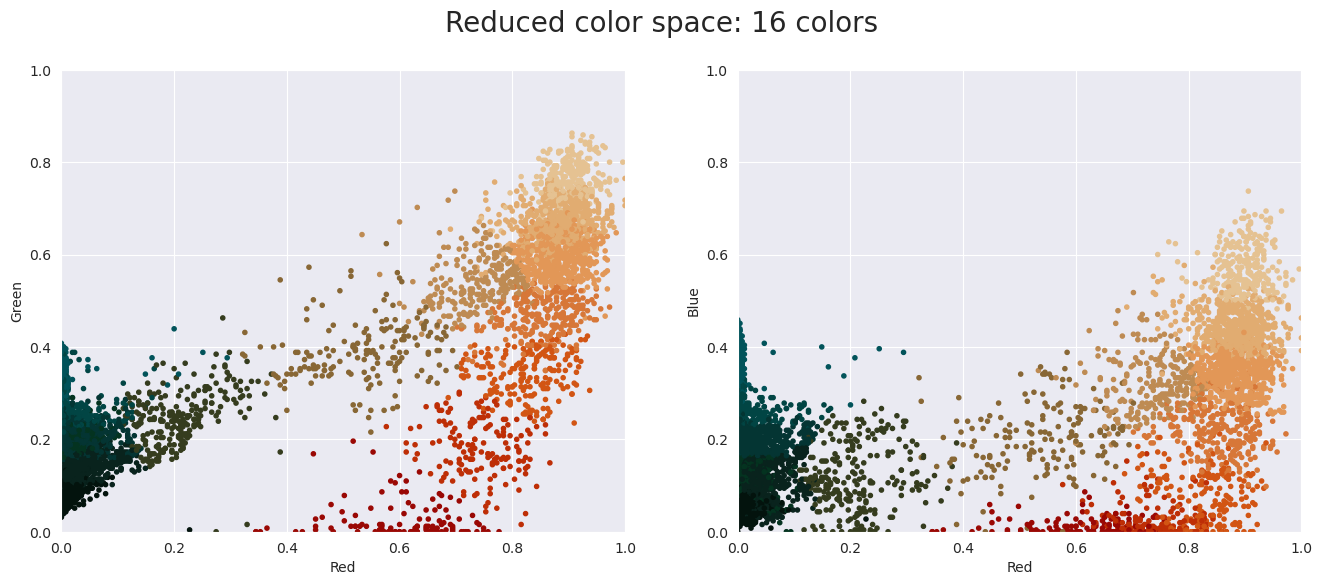

In [171]:
# apply MiniBatchKMeans to image data
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# plot compressed image
plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')

### **Compare Original and Compressed Scater Plot**

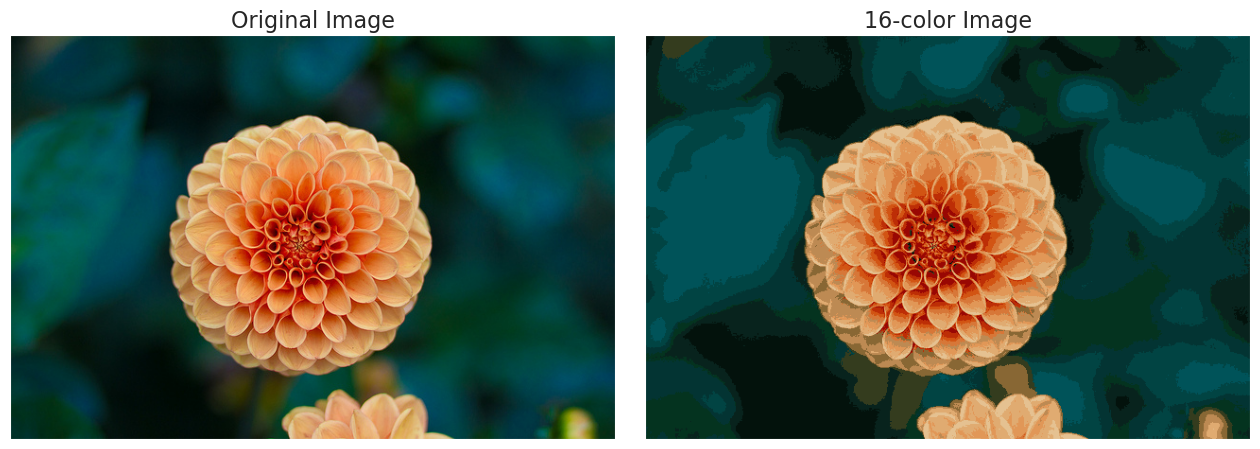

In [172]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);